# Analyzing the Stroop Effect

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition[1] .


(1) What is the independent variable? What is the dependent variable?

- independent variable : if the word matches font color(congruent) or not match (incongruent).
- dependent variable : response time of the participant to say the color of word.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

- $\mu_{I}$ : the mean value of participant's response time for the **incongruent** population.
- $\mu_{C}$ : the mean value of participant's response time for the **congruent** population.


- **$H_{0}$** : response time of incongruent and congruent conditions have the same population means (difference in means is statistically signifacnt) , mathmatically : 
** **$H_{0}$**  : $\mu_{I}$ = $\mu_{C}$ **
- **$H_{1}$**: mean response time of incongruent population  higher than mean response time of congruent population ,mathmatically : 
 **$H_{1}$** : $\mu_{I}$>$\mu_{C}$ 
 
* to determine if the difference of means between two samples is statistically significant or not,we will use the t-test for paired samples , because : the sample size equals 24 (less than 30) and each participant is asked/tested two times.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline


In [2]:
df= pd.read_csv('stroopdata.csv')
df.head(2)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


no null values.

In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


- for congruent sample : mean value= 14.051 and standard deviation = 3.559 
- for incongruent sample : mean value= 22.016 and standard deviation = 4.797 ,that means incongruent values more varianced.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

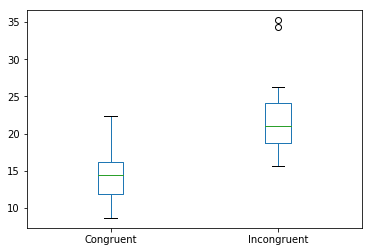

In [5]:
df.plot.box();

- as a result of the previous box plot , we observe that the interquartile values of Incongruent set are extreamly higher than interquartile values of congruent set.
- interquartile range of Incongruent values(5.3355) is wider than interquartile range of congruent values (4.3), that means higher variance of data for the Incongruent , and that explains that Incongruent values variance is a little bit higher than congruent values variance.
- hint : interquartile values mean the values between 25% and 75% of data set which creates 50 % of data.


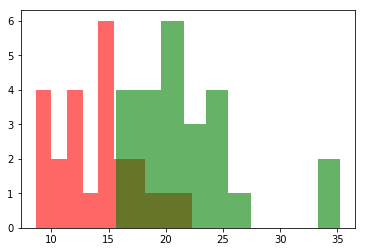

In [6]:
plt.hist(df.Congruent ,color='red' , alpha=0.6)
plt.hist(df.Incongruent,color='green',alpha=0.6);

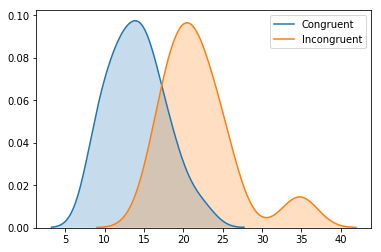

In [7]:
sns.kdeplot(df.Congruent,shade=True)
sns.kdeplot(df.Incongruent,shade=True)

* Both incongruent and congruent samples are look normally distributed with a similar variances.
* incongruent sample has another peak at about 35 seconds ,it seems as an outlier.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

as i mentioned in the second question , i will use the t-test.

In [8]:
cong_mean=df.Congruent.mean()
incong_mean=df.Incongruent.mean()
est_point = cong_mean - incong_mean
est_point

-7.964791666666665

In [9]:
df['diff'] = df['Incongruent'] - df['Congruent']
sdt = df.std()
sdd = sdt['diff'];
sdt

Congruent      3.559358
Incongruent    4.797057
diff           4.864827
dtype: float64

In [10]:
sdd

4.864826910359056

In [11]:
import scipy.stats as stats
tstatistic,p_value=stats.ttest_rel(a = df['Congruent'], b = df['Incongruent'])
alpha=0.05
(tstatistic,p_value)

(-8.020706944109957, 4.103000585711178e-08)

In [12]:
tcritical = stats.t.ppf(q=alpha, df=23)
tcritical

-1.7138715277470478

### results and conclusion :

- degree of freedom = 23 
- $\alpha$ = 0.05
- t-critical values : 1.7138715277470478, -1.7138715277470478
- absolute value of t-Statistic(degree of freedom) = 8.0207069441099
- p-value = 4.103000585711178e-08 = 0.00000004

- we conducted the t-test for to know if mean difference between the reaction time between the congruent vs. incongruent condition is  statistically significant or not .
* absolute value of t-statistic=8.0207 which is greater than the critical t-value(1.71387) in addition to that p-value is too small and less than $\alpha$ , so we ** reject the null hypothesis **.
- We conclude that 95% Confidence Interval  accepts the alternative hypothesis,that says : participant's under incongruent condition take longer time than participant's under congruent condition to say the color of word.
- Our results of stroop effect satisfy the expectations and the results of the previous tests[4,5], and the explain of theis results is that each color interfering signals in your brain that compete for your attention , it's thought that color is processed in pathway known as ventral stream , but the active readings performed in other region called occipital lope and temporal lope , so take the attention to word font color and read word itself becomes difficult [6].

### References :
 - [1] : https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True
 - [2]: udacity classroom and given resources , includes the statistics free lesson :  https://classroom.udacity.com/courses/ud134-nd
 - [3] https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means
 - [4] https://www.sciencedirect.com/topics/neuroscience/stroop-effect
 - [5] : https://imotions.com/blog/the-stroop-effect/
 - [6] : https://www.youtube.com/watch?v=UAKAlP1B5WY&feature=youtu.be